<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/vitaldb_open_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using VitalDB open dataset

## Preparation
For using the VitalDB open dataset, you need to read 3 endpoints first.

In [ ]:
import pandas as pd

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

## Clinical informations
Let's visually check the cases and variables of the VitalDB dataset.

In [ ]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


Then, check the clinical information missing rate.

In [ ]:
print((df_cases.isnull().mean() * 100).to_string())

caseid                  0.000000
subjectid               0.000000
casestart               0.000000
caseend                 0.000000
anestart                0.000000
aneend                  0.000000
opstart                 0.000000
opend                   0.000000
adm                     0.000000
dis                     0.000000
icu_days                0.000000
death_inhosp            0.000000
age                     0.000000
sex                     0.000000
height                  0.000000
weight                  0.000000
bmi                     0.000000
asa                     2.082029
emop                    0.000000
department              0.000000
optype                  0.000000
dx                      0.000000
opname                  0.000000
approach                0.000000
position                3.036944
ane_type                0.000000
preop_htn               0.000000
preop_dm                0.000000
preop_ecg               0.000000
preop_pft               0.000000
preop_hb  

## Track List

In [ ]:
df_trks

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
...,...,...,...
486444,6388,Solar8000/VENT_PIP,2d63adbc7e2653f14348e219816673cde3358cf6
486445,6388,Solar8000/VENT_PPLAT,6f6604255858ddc8f6a01b9f4774b0d43105f6da
486446,6388,Solar8000/VENT_RR,f34f3fae7fd963355c1c7060e1e876d20fa87536
486447,6388,Solar8000/VENT_SET_TV,4a4a55b8aebf9c76a4a76f62a7c1ec6fcb80e618


Then, we can check the missing rate of the tracks.

In [ ]:
print('{} track types'.format(len(df_trks['tname'].unique())))
for tname in sorted(df_trks['tname'].unique()):
    print('{}\t{:.1f}'.format(tname, (df_trks['tname'] == tname).sum() / len(df_cases) * 100))


196 track types
BIS/BIS	91.8
BIS/EEG1_WAV	91.9
BIS/EEG2_WAV	91.9
BIS/EMG	87.3
BIS/SEF	87.2
BIS/SQI	91.8
BIS/SR	87.2
BIS/TOTPOW	86.9
CardioQ/ABP	0.5
CardioQ/CI	0.4
CardioQ/CO	0.5
CardioQ/FLOW	0.5
CardioQ/FTc	0.5
CardioQ/FTp	0.4
CardioQ/HR	0.5
CardioQ/MA	0.4
CardioQ/MD	0.5
CardioQ/PV	0.4
CardioQ/SD	0.5
CardioQ/SV	0.5
CardioQ/SVI	0.4
EV1000/ART_MBP	9.3
EV1000/CI	9.7
EV1000/CO	9.7
EV1000/CVP	3.7
EV1000/SV	9.7
EV1000/SVI	9.7
EV1000/SVR	4.0
EV1000/SVRI	4.0
EV1000/SVV	9.7
FMS/FLOW_RATE	0.2
FMS/INPUT_AMB_TEMP	0.2
FMS/INPUT_TEMP	0.2
FMS/OUTPUT_AMB_TEMP	0.2
FMS/OUTPUT_TEMP	0.2
FMS/PRESSURE	0.2
FMS/TOTAL_VOL	0.2
Invos/SCO2_L	0.5
Invos/SCO2_R	0.5
Orchestra/AMD_RATE	0.0
Orchestra/AMD_VOL	0.0
Orchestra/DEX2_RATE	0.1
Orchestra/DEX2_VOL	0.1
Orchestra/DEX4_RATE	0.1
Orchestra/DEX4_VOL	0.1
Orchestra/DOBU_RATE	0.0
Orchestra/DOBU_VOL	0.0
Orchestra/DOPA_RATE	0.5
Orchestra/DOPA_VOL	0.5
Orchestra/DTZ_RATE	0.0
Orchestra/DTZ_VOL	0.0
Orchestra/EPI_RATE	0.1
Orchestra/EPI_VOL	0.1
Orchestra/FUT_RATE	1.5
Orchestra/F

## Laboratory results

In [ ]:
print('{} lab types'.format(len(df_labs['name'].unique())))
df_labs

34 lab types


,caseid,dt,name,result
0,1,594470,alb,2.90
1,1,399575,alb,3.20
2,1,12614,alb,3.40
3,1,137855,alb,3.60
4,1,399575,alt,12.00
...,...,...,...,...
928443,6388,3503,sao2,100.00
928444,6388,408770,wbc,3.28
928445,6388,-32848,wbc,6.27
928446,6388,-249820,wbc,7.66


## Inclusion & Exclusion Criteria
Research using VitalDB open dataset usually starts with finding cases that meet the inclusion and exclusion criteria. The code below is an example of doing this.

In [ ]:
caseids = list(
    set(df_trks[df_trks['tname'] == 'Solar8000/ART_MBP']['caseid']) & 
    set(df_cases[df_cases['age'] > 18]['caseid']) & 
    set(df_cases[False == df_cases['opname'].str.lower().str.contains("transplant")]['caseid'])
)
print(len(caseids))

3452


## Reading track samples
The next step is to read the actual samples in a specific track. Using the vitaldb library is the simplest way.

In [ ]:
!pip install vitaldb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.3 MB/s 
     |████████████████████████████████| 140 kB 14.0 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 50.2 MB/s 
     |████████████████████████████████| 8.6 MB 40.4 MB/s 
     |████████████████████████████████| 271 kB 44.9 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 144 kB 11.2 MB/s 
     |████████████████████████████████| 127 kB 21.8 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.3.3-py3-none-any.whl size=64640 sha256=25efb59505f338c0ba49d8098d90e4526d2a3a9492b8aa5a665acfb94271e762
  Stored in directory: /root/.cache/pip/wheels/71/90/2f/bf0c130857587a589d0faa0fb743a7e52b915037532008aabe
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uni

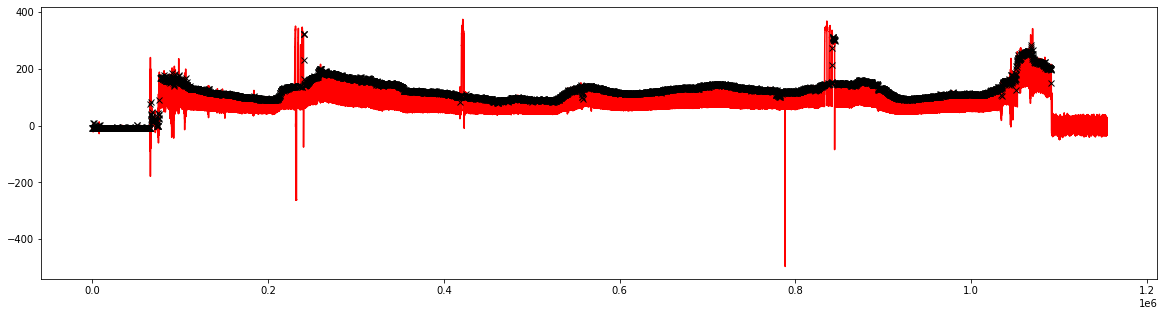

In [ ]:
import vitaldb
vals = vitaldb.load_case(1, ['SNUADC/ART','Solar8000/ART_SBP'], 1/100)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 0], color='r')
plt.plot(vals[:, 1], 'kx')
plt.show()

## More examples
More examples using clinical information data in VitalDB are as below.


*   https://github.com/vitaldb/examples/blob/master/asa_mortality.ipynb
*   https://github.com/vitaldb/examples/blob/master/predict_mortality.ipynb

